In [1]:
data='/content/drive/MyDrive/PokemonData/' 

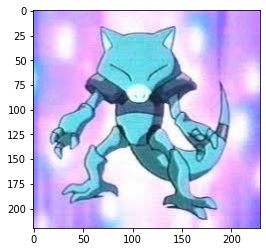

In [3]:
import cv2
import matplotlib.pyplot as plt

img_array = cv2.imread('/content/drive/MyDrive/PokemonData/Abra/1.jpg')
plt.imshow(img_array)
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from keras.optimizers import Adam
from keras.models import Model,load_model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense,Input,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

In [60]:
batch_size = 24                                                                    
classes = 150                                                               
data_gen = ImageDataGenerator(rescale = 1./255,                                   
                              horizontal_flip = True,
                              vertical_flip = False,
                              brightness_range = (0.5, 1.6),
                              rotation_range = 11,
                              validation_split = 0.2)

train_gen = data_gen.flow_from_directory(data,
                                         target_size = (160,160),               
                                         batch_size = batch_size,
                                         subset = 'training', class_mode='categorical')

validataion_gen = data_gen.flow_from_directory(data,
                                               target_size = (160,160),         
                                               batch_size = batch_size,
                                               subset = 'validation', class_mode='categorical')

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


In [25]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(160,160,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 2s 0us/step


In [26]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
import tensorflow as tf
from tensorflow.keras import layers 

In [28]:

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [29]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [32]:
resnet_history = base_model.fit(train_gen, validation_data = validataion_gen, steps_per_epoch =25, epochs = 10)


Epoch 1/10
25/25 [==============================] - 974s 40s/step - loss: 0.8200 - acc: 0.7663 - val_loss: 2.3273 - val_acc: 0.0097
Epoch 2/10
25/25 [==============================] - 318s 13s/step - loss: 0.1288 - acc: 0.9660 - val_loss: 2.4773 - val_acc: 0.0082
Epoch 3/10
25/25 [==============================] - 266s 11s/step - loss: 0.1411 - acc: 0.9734 - val_loss: 2.4680 - val_acc: 0.0082
Epoch 4/10
25/25 [==============================] - 256s 10s/step - loss: 0.1152 - acc: 0.9804 - val_loss: 1.8921 - val_acc: 0.0142
Epoch 5/10
25/25 [==============================] - 225s 9s/step - loss: 0.0957 - acc: 0.9880 - val_loss: 1.6148 - val_acc: 0.0293
Epoch 6/10
25/25 [==============================] - 191s 8s/step - loss: 0.0927 - acc: 0.9920 - val_loss: 1.5811 - val_acc: 0.0398
Epoch 7/10
25/25 [==============================] - 173s 7s/step - loss: 0.1026 - acc: 0.9814 - val_loss: 1.4594 - val_acc: 0.0632
Epoch 8/10
25/25 [==============================] - 160s 6s/step - loss: 0.0973

In [97]:
base_model.save('pokemon.hd5')

INFO:tensorflow:Assets written to: pokemon.hd5/assets


In [38]:
%matplotlib inline
acc = resnet_history.history['acc']
val_acc =resnet_history.history['val_acc']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

<Figure size 432x288 with 0 Axes>

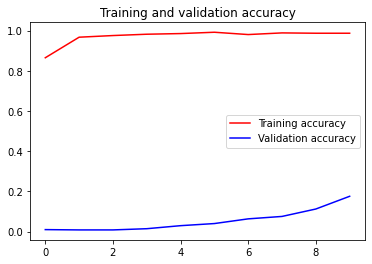

<Figure size 432x288 with 0 Axes>

In [39]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

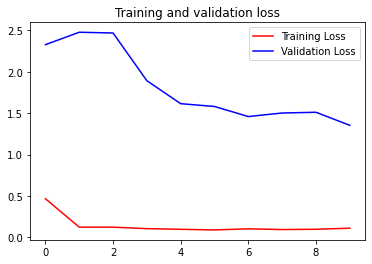

In [40]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [98]:
pred=base_model.predict_generator(validataion_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [99]:
pred

array([[0.76971847],
       [0.77536595],
       [0.5886927 ],
       ...,
       [0.3646361 ],
       [0.52204967],
       [0.94529676]], dtype=float32)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
tf=confusion_matrix( validataion_gen.classes,y_pred)
print(tf)

Confusion Matrix
[[ 7  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  0  0]
 ...
 [11  0  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]]


In [104]:
print(classification_report(validataion_gen.classes, y_pred, target_names=validataion_gen.class_indices))

                  precision    recall  f1-score   support

            Abra       0.01      1.00      0.01         7
      Aerodactyl       0.00      0.00      0.00         7
        Alakazam       0.00      0.00      0.00         5
Alolan Sandslash       0.00      0.00      0.00         8
           Arbok       0.00      0.00      0.00         8
        Arcanine       0.00      0.00      0.00         8
        Articuno       0.00      0.00      0.00         9
        Beedrill       0.00      0.00      0.00         6
      Bellsprout       0.00      0.00      0.00         8
       Blastoise       0.00      0.00      0.00         8
       Bulbasaur       0.00      0.00      0.00         8
      Butterfree       0.00      0.00      0.00         5
        Caterpie       0.00      0.00      0.00         7
         Chansey       0.00      0.00      0.00         8
       Charizard       0.00      0.00      0.00         7
      Charmander       0.00      0.00      0.00        10
      Charmel

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


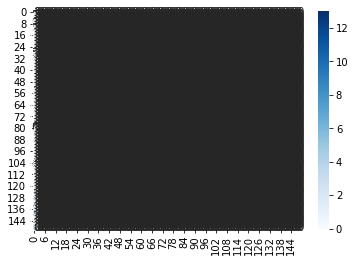

In [114]:
import seaborn as sns
sns.heatmap(tf, annot=True, cmap='Blues')

In [109]:
image,labels=next(validataion_gen)

In [119]:
file='1.jpg'
file1='2.jpg'
import cv2 as cv

In [121]:
img = cv.cvtColor(cv.imread(file),cv.COLOR_BGR2RGB)
img = cv.resize(img, (160,160))
test_image =np.array(img)
test_image = np.expand_dims(test_image, axis=0)
pred = base_model.predict(test_image)
print(pred, labels[np.argmax(pred)])

[[5.136757e-07]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [122]:
img = cv.cvtColor(cv.imread(file1),cv.COLOR_BGR2RGB)
img = cv.resize(img, (160,160))
test_image =np.array(img)
test_image = np.expand_dims(test_image, axis=0)
pred = base_model.predict(test_image)
print(pred, labels[np.argmax(pred)])

[[0.8936612]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
